#   Variation analysis 

##   Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import scipy.stats as st
import seaborn as sns

import statsmodels.api as sm

from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from statsmodels.stats.weightstats  import ttest_ind


  ## Treatment of hypertension 
**Maxwell S.E., Delaney H.D. Designing Experiments and Analyzing Data: A Model Comparison Perspective. (1990).   Chapter 8, page  325. **

  72 patients were treated for hypertension.    Three types of medication were used for treatment, and their effects were studied both in the use of a special diet and in the absence of it; in addition, psychotherapy was used in half of the cases.    Data is the patient's arterial pressure at the end of treatment. 
  There is a need to compare the effectiveness of the treatment of hypertension. 

###   Reading data 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem6/data/hyper.txt', delimiter='\t')
data.head()


,biofeedback,diet,drug,pressure
0,present,absent,1,170
1,present,absent,1,175
2,present,absent,1,165
3,present,absent,1,180
4,present,absent,1,160


In [3]:
data.sample(10, random_state=42)


,biofeedback,diet,drug,pressure
4,present,absent,1,160
62,absent,absent,3,190
18,present,present,2,164
0,present,absent,1,170
28,present,absent,3,204
50,absent,absent,2,217
10,present,present,1,181
34,present,present,3,180
12,present,absent,2,186
54,absent,present,2,171


In [4]:
data.describe(include='all')


,biofeedback,diet,drug,pressure
count,72,72,72.000000,72.000000
unique,2,2,NaN,NaN
top,present,absent,NaN,NaN
freq,36,36,NaN,NaN
mean,NaN,NaN,2.000000,184.500000
std,NaN,NaN,0.822226,17.838872
min,NaN,NaN,1.000000,152.000000
25%,NaN,NaN,1.000000,170.750000
50%,NaN,NaN,2.000000,182.500000
75%,NaN,NaN,3.000000,198.250000


###   Three-factor dispersive analysis for patients 

In [5]:
lm = ols('pressure ~ C(biofeedback) * C(diet) * C(drug)', data=data).fit()
table = sm.stats.anova_lm(lm, typ=1)
table


,df,sum_sq,mean_sq,F,PR(>F)
C(biofeedback),1.0,2048.0,2048.000000,13.072340,6.150719e-04
C(diet),1.0,5202.0,5202.000000,33.204255,3.053308e-07
C(drug),2.0,3675.0,1837.500000,11.728723,5.018624e-05
C(biofeedback):C(diet),1.0,32.0,32.000000,0.204255,6.529374e-01
C(biofeedback):C(drug),2.0,259.0,129.500000,0.826596,4.424565e-01
C(diet):C(drug),2.0,903.0,451.500000,2.881915,6.381527e-02
C(biofeedback):C(diet):C(drug),2.0,1075.0,537.500000,3.430851,3.883423e-02
Residual,60.0,9400.0,156.666667,NaN,NaN


In [6]:
table[table['PR(>F)'] < 0.05]


,df,sum_sq,mean_sq,F,PR(>F)
C(biofeedback),1.0,2048.0,2048.0,13.072340,6.150719e-04
C(diet),1.0,5202.0,5202.0,33.204255,3.053308e-07
C(drug),2.0,3675.0,1837.5,11.728723,5.018624e-05
C(biofeedback):C(diet):C(drug),2.0,1075.0,537.5,3.430851,3.883423e-02


###  # We'll build a schedule of interactions 

$$X_{ijk} = \mu + \alpha_i + \beta_j + \gamma_{ij} + \varepsilon_{ijk},$$

$$i = 1, ..., K_1,\ j = 1, ..., K_2,\ k = 1, ..., n.$$

- $\mu$ is the total average value of the sign, 

- $\alpha_i$ -- impact of $i dollar factor f_1, 

- $\beta_j$ is the impact of $j's value of $f_2, 

- $\gamma_{ij}$ is the additional effect of a combination of $i levels and $j factors of $f_1 and $f_2 

- $\varepsilon_{ijk}$ -- random independent equally distributed errors 

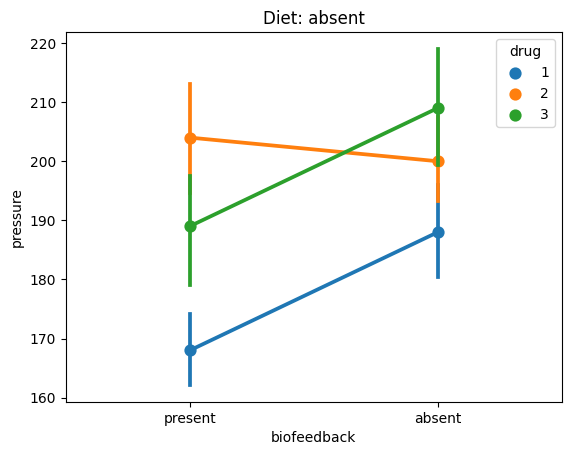

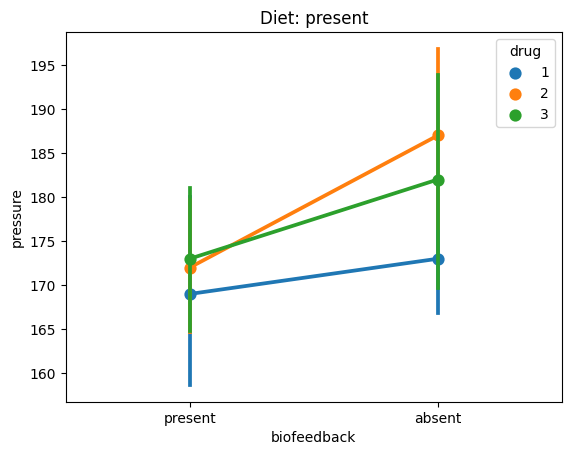

In [7]:
plt.title('Diet: absent')
_ = sns.pointplot(x="biofeedback", y="pressure", data=data.loc[data['diet']=='absent'], hue='drug')
plt.show()

plt.title('Diet: present')
_ = sns.pointplot(x="biofeedback", y="pressure", data=data.loc[data['diet']=='present'], hue='drug')
plt.show()


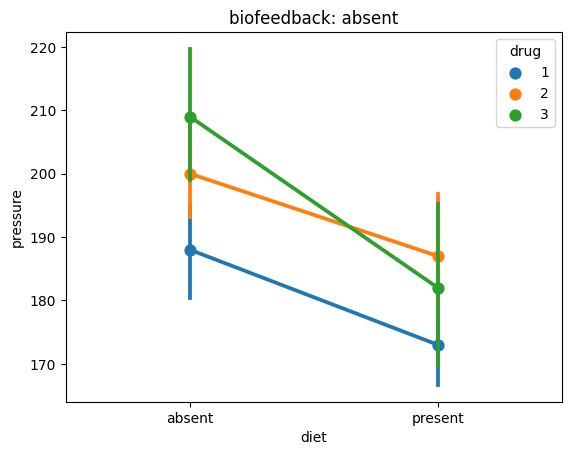

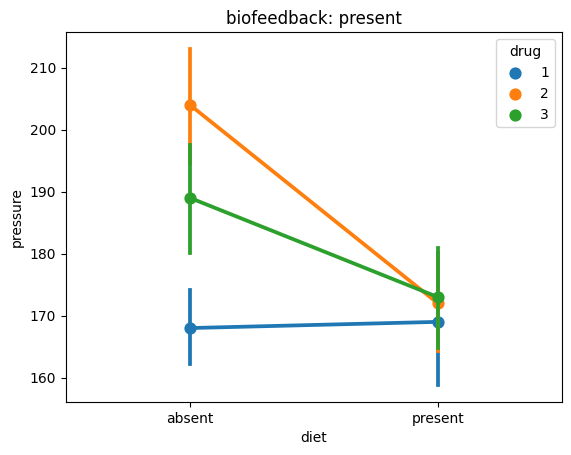

In [8]:
plt.title('biofeedback: absent')
_ = sns.pointplot(x="diet", y="pressure", data=data.loc[data['biofeedback']=='absent'], hue='drug')
plt.show()

plt.title('biofeedback: present')
_ = sns.pointplot(x="diet", y="pressure", data=data.loc[data['biofeedback']=='present'], hue='drug')
plt.show()


  The triple interaction is significant, so we'll split the sample by one of the topics. 

###   Two-factor dispersive analysis for psychotherapy patients 

In [9]:
lm = ols('pressure ~ C(diet) * C(drug)', data=data.loc[data['biofeedback']=='present']).fit()
table = sm.stats.anova_lm(lm)
table


,df,sum_sq,mean_sq,F,PR(>F)
C(diet),1.0,2209.0,2209.000000,15.248504,0.000496
C(drug),2.0,2342.0,1171.000000,8.083295,0.001556
C(diet):C(drug),2.0,1634.0,817.000000,5.639669,0.008334
Residual,30.0,4346.0,144.866667,NaN,NaN


  There's a significant inter-factorial interaction. 

###  # Graphs 

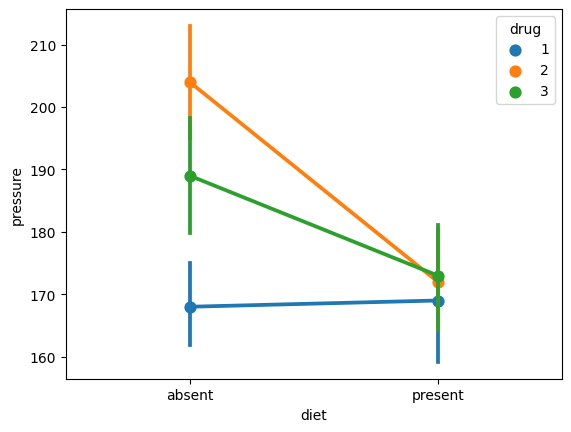

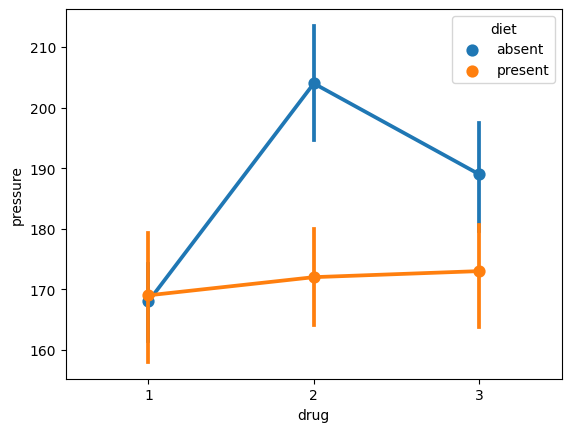

In [10]:
_ = sns.pointplot(x="diet", y="pressure", data=data.loc[data['biofeedback']=='present'], hue='drug')
plt.show()
_ = sns.pointplot(x="drug", y="pressure", data=data.loc[data['biofeedback']=='present'], hue='diet')
plt.show()


  So let's split the sample again. 

###   Single-factor analysis for patients undergoing psychotherapy and dieting: 

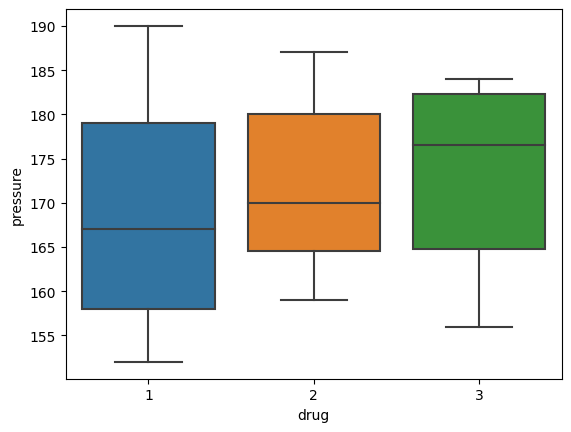

In [11]:
_ = sns.boxplot(x='drug', y='pressure', data=data[(data['biofeedback']=='present') & (data['diet']=='present')])
plt.show()


In [12]:
lm =  ols('pressure ~ C(drug)',data=data.loc[(data['biofeedback']=='present') & (data['diet']=='present')]).fit()
table = sm.stats.anova_lm(lm)
table


,df,sum_sq,mean_sq,F,PR(>F)
C(drug),2.0,52.0,26.0,0.164141,0.850126
Residual,15.0,2376.0,158.4,NaN,NaN


  Expected p-value: ``~0.850126 `'' 

###   Single-factor analysis for patients undergoing psychotherapy who do not sit on a diet: 

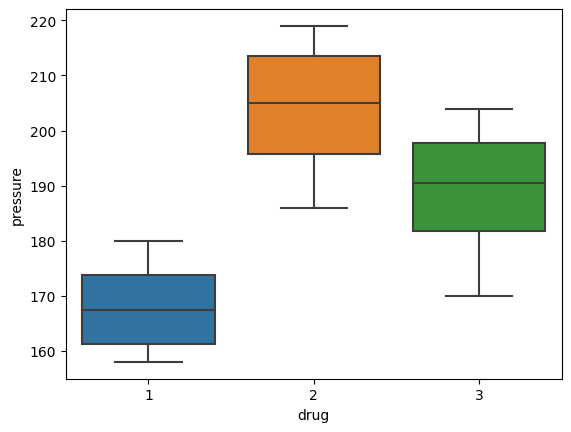

In [13]:
_ = sns.boxplot(x='drug', y='pressure', data=data[(data['biofeedback']=='present') & (data['diet']=='absent')])


In [14]:
lm =  ols('pressure ~ C(drug)',data=data.loc[(data['biofeedback']=='present') & (data['diet']=='absent')]).fit()
table = sm.stats.anova_lm(lm)
table


,df,sum_sq,mean_sq,F,PR(>F)
C(drug),2.0,3924.0,1962.000000,14.939086,0.000269
Residual,15.0,1970.0,131.333333,NaN,NaN


  Expected p-value: ``~0.00269''' 

###  # Researched differences in effects between groups 

In [15]:
mc = MultiComparison(data.loc[(data['biofeedback']=='present') & (data['diet']=='absent')]['pressure'],
                     data.loc[(data['biofeedback']=='present') & (data['diet']=='absent')]['drug'])
result = mc.tukeyhsd()

print(result)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     36.0 0.0002  18.8139 53.1861   True
     1      3     21.0 0.0163   3.8139 38.1861   True
     2      3    -15.0  0.092 -32.1861  2.1861  False
-----------------------------------------------------


  Drug 1 is more effective than the other two. 

###   Two-factor dispersive analysis for non-psychotherapy patients: 

In [16]:
lm = ols('pressure ~ C(diet) * C(drug)',data=data[data['biofeedback']=='absent']).fit()
table = sm.stats.anova_lm(lm, typ=1)
table


,df,sum_sq,mean_sq,F,PR(>F)
C(diet),1.0,3025.0,3025.000000,17.956074,0.000198
C(drug),2.0,1592.0,796.000000,4.724970,0.016448
C(diet):C(drug),2.0,344.0,172.000000,1.020973,0.372422
Residual,30.0,5054.0,168.466667,NaN,NaN


  Inter-factorial interaction is insignificant: 

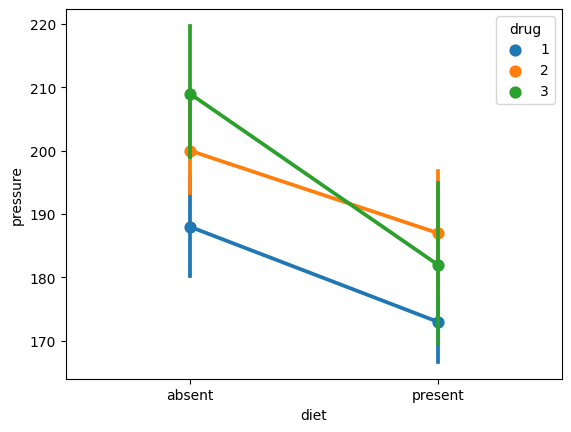

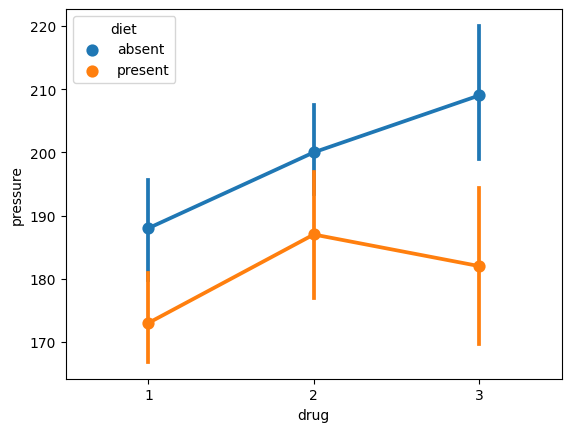

In [17]:
_ = sns.pointplot(x="diet", y="pressure", data=data[data['biofeedback']=='absent'], hue='drug')
plt.show()

_ = sns.pointplot(x="drug", y="pressure", data=data[data['biofeedback']=='absent'], hue='diet')
plt.show()


###  # Researched two-by-one differences in the effects of each drug according to diet 

In [18]:
subset = data[data.diet == 'absent']
mc = MultiComparison(subset['pressure'], subset['drug'])
result = mc.tukeyhsd()
print(result)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     24.0 0.0006   9.8911 38.1089   True
     1      3     21.0 0.0025   6.8911 35.1089   True
     2      3     -3.0 0.8613 -17.1089 11.1089  False
-----------------------------------------------------


In [19]:
subset = data[data.diet == 'present']
mc = MultiComparison(subset['pressure'], subset['drug'])
result = mc.tukeyhsd()
print(result)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2      8.5  0.299  -5.3061 22.3061  False
     1      3      6.5 0.4878  -7.3061 20.3061  False
     2      3     -2.0 0.9329 -15.8061 11.8061  False
-----------------------------------------------------


  ### Subtotal: 
  * If the patient is not receiving psychotherapy, diet adherence results in a significant reduction in the pressure at any of the three medications; 
  The effectiveness of all three drugs is indistinguishable for diet and psychotherapy patients; 
  * For patients undergoing psychotherapy who do not sit on a diet, drug 1 is more effective on average by about 20 mm.    C.O.D.    The Committee recommends that the State party take all necessary measures to ensure the full implementation of the provisions of the Convention. 
  * To draw other possible conclusions (e.g., assess the effects of psychotherapy and diet effects for those undergoing psychotherapy), it is necessary to break down the three-factor analysis on two other topics. 


  ## The growth of choir singers ♪ 
**Cleveland W. S. (1993) Visualizing Data. Summit, New Jersey: Hobart Press. **

  In 1979, 235 members of the New York Glee Association were interviewed, each of whom has a record of growth and a voice register.    Does average growth change with the register? 


In [20]:
data =  sm.datasets.get_rdataset('singer', 'lattice').data
data.head()


,height,voice.part
0,64,Soprano 1
1,62,Soprano 1
2,66,Soprano 1
3,65,Soprano 1
4,60,Soprano 1


  We're going to say two columns and we're going to turn growth into centimeters. 

In [21]:
data.columns = ['height', 'voice']
data['height'] *= 2.54


In [22]:
data.describe()


,height
count,235.000000
mean,170.936596
std,9.714908
min,152.400000
25%,165.100000
50%,170.180000
75%,177.800000
max,193.040000


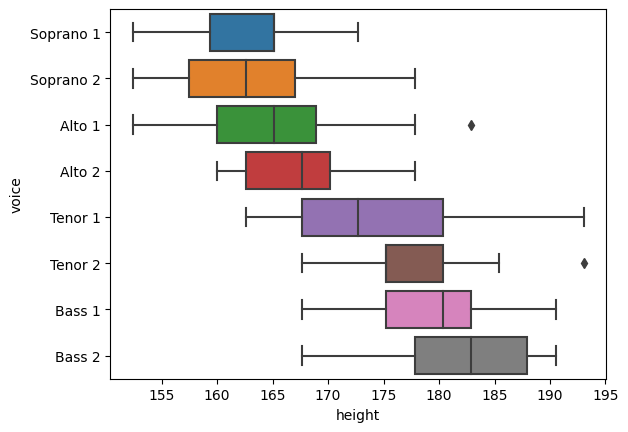

In [23]:
_ = sns.boxplot(x='height', y='voice', data=data)
plt.show()


###   Single dispersive analysis: 

In [24]:
lm = ols('height ~ C(voice)', data=data).fit()
table = sm.stats.anova_lm(lm)
table


,df,sum_sq,mean_sq,F,PR(>F)
C(voice),7.0,12911.303982,1844.471997,45.641891,5.617050e-40
Residual,227.0,9173.483695,40.411822,NaN,NaN


  Expected p-value ~ `5.6e-40' 

In [25]:
data.groupby('voice').mean()


,height
voice,
Alto 1,164.809714
Alto 2,167.734074
Bass 1,179.623590
Bass 2,181.316923
Soprano 1,163.195000
Soprano 2,162.475333
Tenor 1,175.018095
Tenor 2,177.558095


###   Criterion of Kruskal on the equality of average: 

In [26]:
st.kruskal(*data.groupby('voice').groups.values())


KruskalResult(statistic=229.8276956364947, pvalue=5.399740283982908e-46)

###   Bartlett &apos; s variance equality criterion: 

In [27]:
st.bartlett(*data.groupby('voice').groups.values())


BartlettResult(statistic=18.417706445737398, pvalue=0.010221018996479406)

###   HSD Tuki: 

###  # The existence of differences between groups 

In [28]:
mc = MultiComparison(data['height'], data['voice'])
result = mc.tukeyhsd()
 
print(result)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
   Alto 1    Alto 2   2.9244 0.6235  -2.0573    7.906  False
   Alto 1    Bass 1  14.8139    0.0  10.2855  19.3423   True
   Alto 1    Bass 2  16.5072    0.0  11.4717  21.5427   True
   Alto 1 Soprano 1  -1.6147 0.9623  -6.2315   3.0021  False
   Alto 1 Soprano 2  -2.3344 0.8195  -7.1734   2.5046  False
   Alto 1   Tenor 1  10.2084    0.0     4.84  15.5768   True
   Alto 1   Tenor 2  12.7484    0.0     7.38  18.1168   True
   Alto 2    Bass 1  11.8895    0.0   7.0204  16.7587   True
   Alto 2    Bass 2  13.5828    0.0   8.2389  18.9268   True
   Alto 2 Soprano 1  -4.5391  0.099  -9.4905   0.4124  False
   Alto 2 Soprano 2  -5.2587 0.0422  -10.418  -0.0995   True
   Alto 2   Tenor 1    7.284 0.0027   1.6252  12.9428   True
   Alto 2   Tenor 2    9.824    0.0   4.1652  15.4828   True
   Bass 1    Bass 2   1.

  *## Outcome: 
  - in general, the type of voice has a significant effect on growth 
  - There are differences in this influence only between certain pairs of votes 

  ## The effect of vitamin C on the growth of guinea pig teeth 
**Crampton E. W. (1947) The growth of the odontoblast of the incisor teeth as a criterion of vitamin C intake of the guinea pig. The Journal of Nutrition 33(5): 491–504. **

  The experiment examined the effects of vitamin C on the growth of x_markdown_link_xx guinea pigs. 
  Three doses of vitamin (0.5, 1 and 2 mg) and two treatments (orange juice and pure ascorbine acid) were considered.    In each of the six levels of the two factors, measurements were made for 10 guinea pigs. 

In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem6/data/ToothGrowth.csv', index_col=0)
data.head()


,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5


In [30]:
data.supp.unique()


array(['VC', 'OJ'], dtype=object)

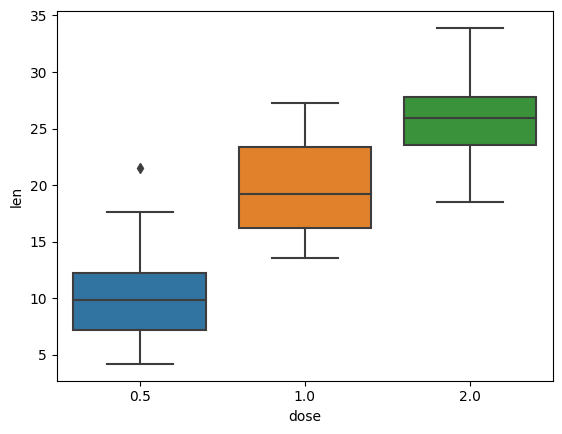

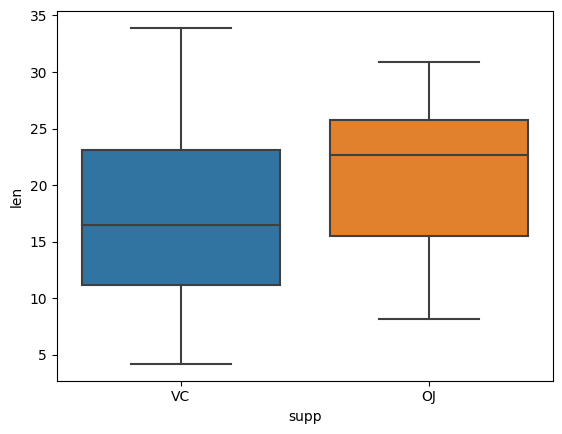

In [31]:
_ = sns.boxplot(x='dose', y='len', data=data)
plt.show()

_ = sns.boxplot(x='supp', y='len', data=data)
plt.show()


###   Two-factor dispersive analysis 

###  # Without inter-factorial interaction: 

In [32]:
lm = ols('len ~ C(supp) + C(dose)',data=data).fit()
table = sm.stats.anova_lm(lm)
table


,df,sum_sq,mean_sq,F,PR(>F)
C(supp),1.0,205.350000,205.350000,14.016638,4.292793e-04
C(dose),2.0,2426.434333,1213.217167,82.810935,1.871163e-17
Residual,56.0,820.425000,14.650446,NaN,NaN


###  # Taking into account inter-factorial interaction: 

In [33]:
lm = ols('len ~ C(supp) * C(dose)', data=data).fit()
table = sm.stats.anova_lm(lm, typ=1)
table


,df,sum_sq,mean_sq,F,PR(>F)
C(supp),1.0,205.350000,205.350000,15.571979,2.311828e-04
C(dose),2.0,2426.434333,1213.217167,91.999965,4.046291e-18
C(supp):C(dose),2.0,108.319000,54.159500,4.106991,2.186027e-02
Residual,54.0,712.106000,13.187148,NaN,NaN


###   Inter-factorial interaction: 

$$X_{ijk} = \mu + \alpha_i + \beta_j + \gamma_{ij} + \varepsilon_{ijk},$$

$$i = 1, ..., K_1,\ j = 1, ..., K_2,\ k = 1, ..., n.$$

- $\mu $is the total average value of the sign, 

- $\alpha_i$ -- impact of $i dollar factor f_1, 

- $\beta_j$ is the impact of $j's value of $f_2, 

- $\gamma_{ij}$ is the additional effect of a combination of $i levels and $j factors of $f_1 and $f_2 

- $\varepsilon_{ijk}$ -- random independent equally distributed errors 

`sns.pointplot`:
  - points -- mean values of the parameter studied for each group (nominal variable) 
  95 per cent confidence interval 

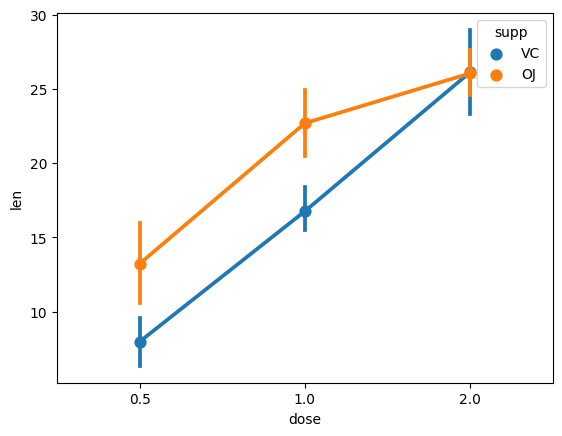

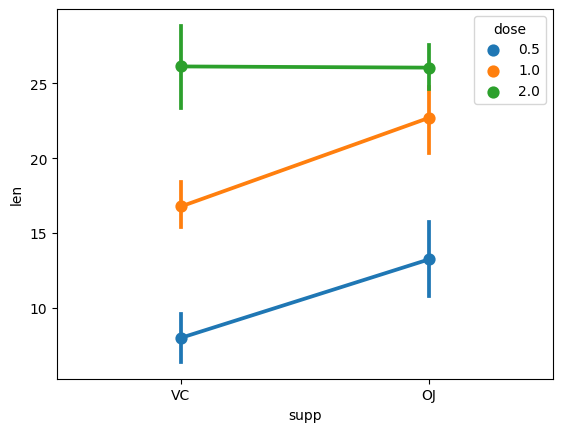

In [34]:
_ = sns.pointplot(x="dose", y="len", data=data, hue='supp')
plt.show()

_ = sns.pointplot(x="supp", y="len", data=data, hue='dose')
plt.show()


  The interaction between the factors can be observed when the result of the effect of one factor on the dependent variable is not the same at different values of the other. 

###   The interaction is significant, so let's split the sample by the way of taking vitamins. 

In [35]:
OJ = data[data['supp']=='OJ']
VC = data[data['supp']=='VC']
VC.shape, OJ.shape


((30, 3), (30, 3))

###  # For guinea pigs taking ascorbine acid: 

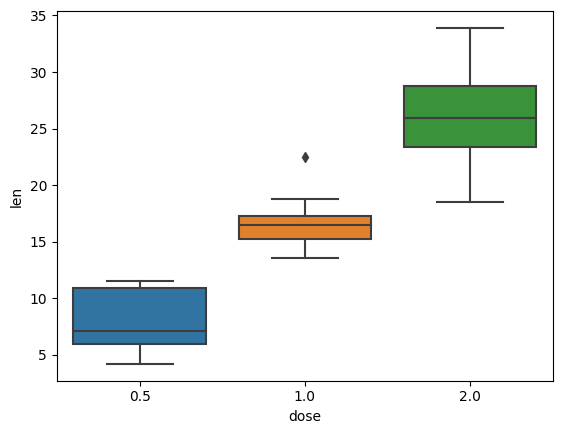

In [36]:
_ = sns.boxplot(x='dose', y='len', data=VC)
plt.show()


In [37]:
lm = ols('len ~ C(dose)',data=VC).fit()
table = sm.stats.anova_lm(lm)
table


,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,1649.488667,824.744333,67.072379,3.357317e-11
Residual,27.0,332.001000,12.296333,NaN,NaN


  For guinea pigs taking ascorbine acid, the effect of different levels of dose factor varies 

###  ## Criterion of Kraskel-Wallis on the equality of all middle groups 

In [38]:
st.kruskal(*VC.groupby('dose').groups.values())


KruskalResult(statistic=25.80645161290323, pvalue=2.49000508218493e-06)

###  ## Researched two-by-one differences in effects on the target point between all levels of dose factor 

In [39]:
mc = MultiComparison(VC['len'], VC['dose'])
result = mc.tukeyhsd()
 
print(result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   0.5    1.0     8.79   0.0  4.9018 12.6782   True
   0.5    2.0    18.16   0.0 14.2718 22.0482   True
   1.0    2.0     9.37   0.0  5.4818 13.2582   True
---------------------------------------------------


  Significant differences in impact on target variable exist between each pair of groups 

###  # For guinea pigs taking orange juice: 

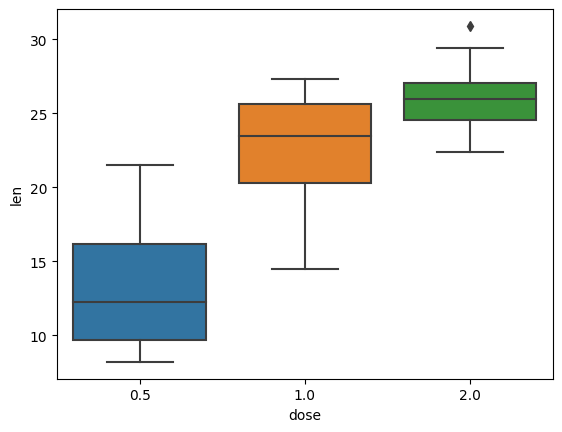

In [40]:
_ = sns.boxplot(x='dose', y='len', data=OJ)
plt.show()


In [41]:
lm = ols('len ~ C(dose)',data=OJ).fit()
table = sm.stats.anova_lm(lm)
table


,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,885.264667,442.632333,31.441504,8.887164e-08
Residual,27.0,380.105000,14.077963,NaN,NaN


  Reject the hypothesis that each level of the dose factor makes the same contribution to the target variable 

###  ## Researched two-by-one differences in effects on the target point between all levels of dose factor 

In [42]:
mc = MultiComparison(OJ['len'], OJ['dose'])
result = mc.tukeyhsd()
 
print(result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.5    1.0     9.47    0.0  5.3096 13.6304   True
   0.5    2.0    12.83    0.0  8.6696 16.9904   True
   1.0    2.0     3.36 0.1309 -0.8004  7.5204  False
----------------------------------------------------


  There are no significant differences in effects on the target topic between 1 and 2 only 

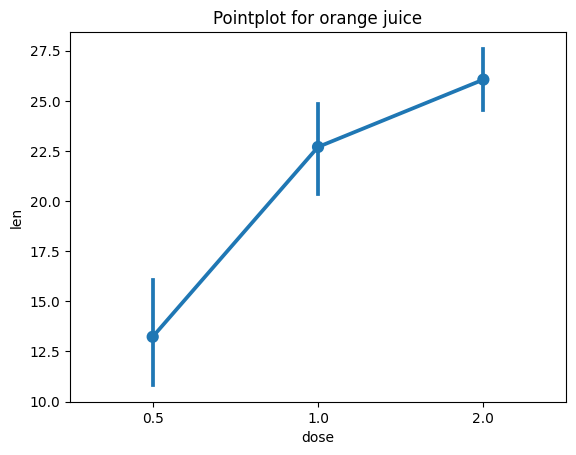

In [43]:
_ = sns.pointplot(x="dose", y="len", data=OJ)
plt.title('Pointplot for orange juice')
plt.show()


  ### Total 
  - For guinea pigs taking ascorbine acid, the difference between dose size is always significant 
  - For guinea pigs taking orange juice, the difference between the dose size of 1 and 2 mg is not significant 

  # # Marijuana and the speed of reaction 


  The impact of marijuana on response rates was studied. 
  As subjects 
  12 persons were selected from each category: 
  * Never tried marijuana; 
  * Sometimes use marijuana; 
  * Regular use of marijuana. 
  
  The subjects were divided into two equal groups; half of them gave 
  smoke two cigarettes with marijuana, the other half smoked two ordinary cigarettes. 
  Cigarettes with the smell and taste of marijuana.    Right after that, all the test subjects passed. 
  Reaction speed test. 
  The impact of marijuana on response rates needs to be assessed, taking into account 
  Previous consumption experience. 

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem6/data/weed.txt', delimiter='\t')
data.head()


,Placebo/Marijuana,None,Light,Moderate
0,1,795,800,790
1,1,605,705,600
2,1,700,610,695
3,1,752,757,752
4,1,648,645,634


In [45]:
data.describe()


,Placebo/Marijuana,None,Light,Moderate
count,12.000000,12.000000,12.000000,12.000000
mean,1.500000,790.416667,733.416667,739.166667
std,0.522233,110.027648,70.766528,101.902657
min,1.000000,605.000000,610.000000,600.000000
25%,1.000000,707.500000,695.000000,680.000000
50%,1.500000,803.000000,735.000000,739.500000
75%,2.000000,868.250000,782.000000,784.000000
max,2.000000,965.000000,843.000000,983.000000


In [46]:
placebo = data[data['Placebo/Marijuana']==1]
placebo.head()


,Placebo/Marijuana,None,Light,Moderate
0,1,795,800,790
1,1,605,705,600
2,1,700,610,695
3,1,752,757,752
4,1,648,645,634


In [47]:
weed = data[data['Placebo/Marijuana']==2]
weed.head()


,Placebo/Marijuana,None,Light,Moderate
6,2,965,843,983
7,2,878,765,744
8,2,865,713,735
9,2,916,776,782
10,2,811,810,815


  Let's put the sample into a more appropriate representation: one object = = one person 

In [48]:
new_data = []
for i in data.values:
    new_data.append({'placebo': i[0]==1, 'time': i[1], 'type':'none'})
    new_data.append({'placebo': i[0]==1, 'time': i[2], 'type':'light'})
    new_data.append({'placebo': i[0]==1, 'time': i[3], 'type':'moderate'})
new_data = pd.DataFrame(new_data)
new_data.head()


,placebo,time,type
0,True,795,none
1,True,800,light
2,True,790,moderate
3,True,605,none
4,True,705,light


In [49]:
len(new_data)


36

###   Let's see the timing of the reaction. 

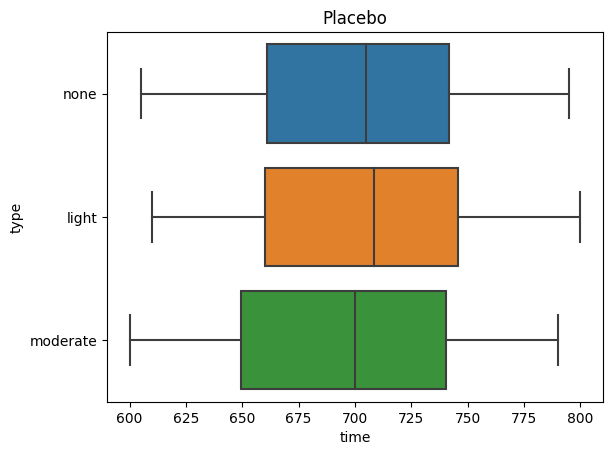

In [50]:
sns.boxplot(data=new_data[new_data['placebo']==True], x='time', y='type' )
_ = plt.title('Placebo')
plt.show()


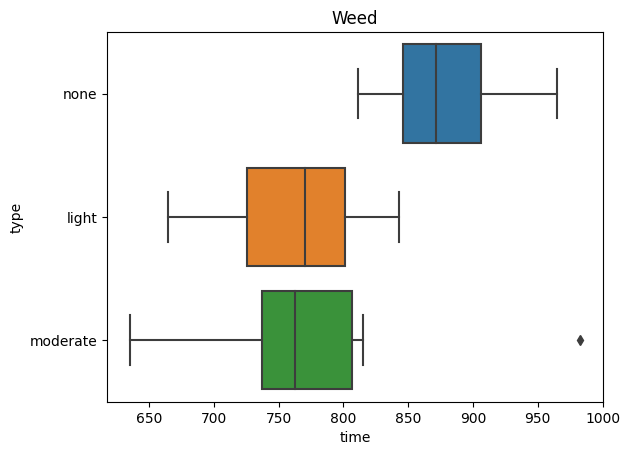

In [51]:
sns.boxplot(data=new_data[new_data['placebo']==False], x='time', y='type' )
_ = plt.title('Weed')
plt.show()


###   Dispersive analysis 

###  # Two-factor analysis (plachebo + smoker type) 

In [52]:
lm = ols('time ~ C(type) + C(placebo) + C(placebo):C(type)',  data=new_data).fit()


  ###  What happened? 
  
$$X_{ijk} = \mu + \alpha_i + \beta_j + \gamma_{ij} + \varepsilon_{ijk},$$

$$i = 1, ..., K_1,\ j = 1, ..., K_2,\ k = 1, ..., n.$$

- $\mu is the total average value of the sign, 

- $\alpha_i$ -- impact of $i dollar factor f_1, 

- $\beta_j4 is the impact of $j's value of $f_2, 

- $\gamma_{ij}$ is the additional effect of a combination of $i levels and $j factors of $f_1 and $f_2 

- $\varepsilon_{ijk}$ -- random independent equally distributed errors 

  - ``ols''' is the method of least squares for regression task 
  - Inside is the formula from ``patsy'' ([see patsy](https://patsy.readthedocs.io/en/latest/formulas.html#formulas)) 
  
  A short tour of the formula ``patsy'''. 
  
  - The formula is divided into: 
  
  left: ``time' &apos; -- target topic 
  
  - Right: ``C(type) + C(placebo) + C(placebo): C(type) ` &apos; -- an expression consisting of the factors whose effect on the target point we are investigating and some operations 
  
  - `~' -- split left and right 
  
  - `+' -- take only the signs into account, not considering their internal interactions. 
  
  - `:' -- take into account only the internal interactions between the signs ($A\cap B$) 
  
  - `*' -- take into account both the signs themselves and their internal interactions (A $\cup B) 
  
  - `C(...) &apos; is a categorical sign 

  Different information on the model obtained can be seen 

In [53]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     5.130
Date:                Wed, 01 Feb 2023   Prob (F-statistic):            0.00162
Time:                        20:24:51   Log-Likelihood:                -203.97
No. Observations:                  36   AIC:                             419.9
Df Residuals:                      30   BIC:                             429.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                762.0000     31.251     24.383      0.000     698.176     825.824
C(type)[T.moderate]                       20.3333     44.196      0.460      0.649     -69.927     110.594
C(type)[T.none]                          117.1667     44.196      2.651      0.013      26.906     207.427
C(placebo)[T.True]                       -57.1667     44.196     -1.293      0.206    -147.427      33.094
C(placebo)[T.True]:C(type)[T.moderate]   -29.1667     62.503     -0.467      0.644    -156.814      98.481
C(placebo)[T.True]:C(type)[T.none]      -120.3333     62.503     -1.925      0.064    -247.981       7.314
==============================================================================
Omnibus:                        1.835   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                0.941
Skew:                           0.356   Prob(JB):                        0.625
Kurtosis:                       3.346   Cond. No.                         9.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
sm.stats.anova_lm(lm)


,df,sum_sq,mean_sq,F,PR(>F)
C(type),2.0,23634.500000,11817.250000,2.016638,0.150752
C(placebo),1.0,103041.000000,103041.000000,17.584155,0.000224
C(placebo):C(type),2.0,23642.166667,11821.083333,2.017292,0.150665
Residual,30.0,175796.333333,5859.877778,NaN,NaN


In [55]:
lm = ols('time ~ C(placebo)', data=new_data).fit()


In [56]:
sm.stats.anova_lm(lm)


,df,sum_sq,mean_sq,F,PR(>F)
C(placebo),1.0,103041.0,103041.000000,15.705146,0.00036
Residual,34.0,223073.0,6560.970588,NaN,NaN


###  # Student's criterion for equality of matrimony 

  In the assumption of equality of dispersions 

In [57]:
ttest_ind(new_data[new_data['placebo']==True]['time'], new_data[new_data['placebo']==False]['time'], usevar='pooled')


(-3.9629718456124134, 0.00036003525353863977, 34.0)

  No guess. 

In [58]:
ttest_ind(new_data[new_data['placebo']==True]['time'], new_data[new_data['placebo']==False]['time'], usevar='unequal')


(-3.9629718456124134, 0.0004149339054483141, 30.42418334548216)

  Left-hand alternative 

In [59]:
ttest_ind(new_data[new_data['placebo']==True]['time'], new_data[new_data['placebo']==False]['time'], alternative='smaller', usevar='pooled')


(-3.9629718456124134, 0.00018001762676931988, 34.0)

  *## Outcome: 
  - The fact that a person has taken marijuana before does not affect the speed of his reaction 
  - When the marijuana is smoked, the reaction of the human being is much lost. 